# Descrição dos Dados

A indústria Gelatina Ltda. está analisando a possibilidade de implementação de uma rede neural
Perceptron para controlar (ligar ou desligar) o motor de um processo específico de sua linha de produção.
Durante o período de 1 mês realizou-se a aquisição dos dados relativos às variáveis de entrada (Pressão e
Temperatura) e saída (Acionamento do motor), ou seja, monitorou-se o comportamento do processo.

O dataset em questão é composto por 386 linhas e 3 colunas, onde, contextualmete representam duas entradas e uma saída binária representando sua classe.

<h2>Dicionário</h2>

X1 -> Pressão 
<br />
X2 -> Temperatura | Float64
<br />
Y -> Desligar o motor (0) ou Ligar o motor(1) | Int64

# Dependências

In [1]:
# Deps
!pip install numpy
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização dos Dados

In [3]:
# Importando o arquivo xlsx com os dados
motor_df = pd.read_excel("rna_database.xlsx", decimal=".", header=0)
motor_df.head()

,X1,X2,Y
0,-0.215326,-0.288510,0
1,-0.263642,-0.673541,0
2,-0.843519,0.215869,0
3,-0.934878,0.551532,0
4,-0.017532,0.244474,0


In [4]:
# A base de dados é composta por 386 dados contendo duas entradas X1 X2 e uma saída Y.
motor_df.shape

(386, 3)

In [5]:
motor_df.describe()

,X1,X2,Y
count,386.000000,386.000000,386.000000
mean,0.160199,0.012703,0.507772
std,0.604064,0.686653,0.500588
min,-0.988142,-0.999918,0.000000
25%,-0.344689,-0.637910,0.000000
50%,0.302345,-0.003418,1.000000
75%,0.697541,0.716575,1.000000
max,0.998171,1.000000,1.000000


In [6]:
# Há dados nulos?
motor_df.isnull().sum()

X1    0
X2    0
Y     0
dtype: int64

In [7]:
motor_df.dtypes

X1    float64
X2    float64
Y       int64
dtype: object

# Demonstração dos Dados

In [8]:
# Transformando os dados em um array
X1 = motor_df.iloc[:, 0].to_numpy()
X2 = motor_df.iloc[:, 1].to_numpy()

<Axes: xlabel='X1', ylabel='X2'>

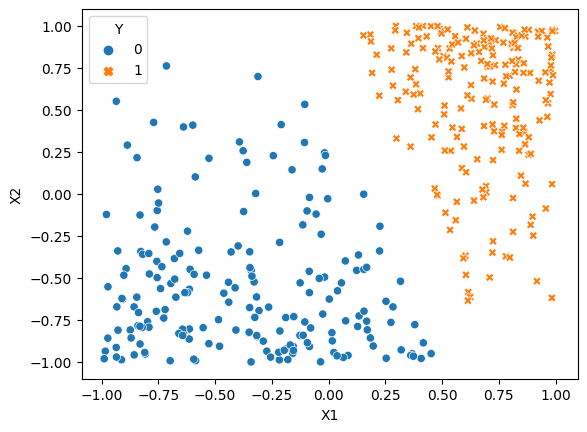

In [9]:
sns.scatterplot(data=motor_df, x="X1", y = "X2", hue="Y", style="Y")

Nota-se que em questão de dispersão de dados, os dois conseguem se dinstinguir de forma eficaz e sem invasões, oque ajuda muito para o uso de uma rede como a <strong>Perceptron</strong>, que utiliza apenas uma função de reta.

## Outliers

Geralmente em uma base de dados ocorrem a existência de dados fora do comum, chamados de outlier, que podem prejudicar a análise e o uso da rede.

<Axes: >

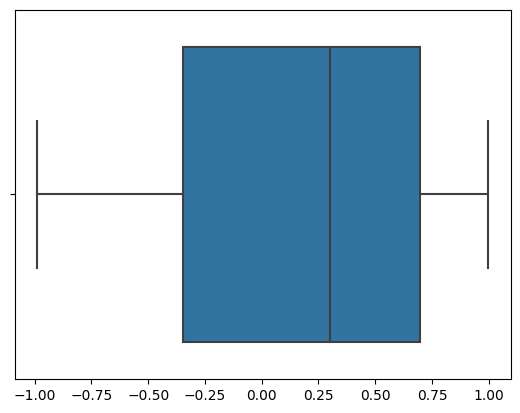

In [10]:
sns.boxplot(x=X1)

<Axes: >

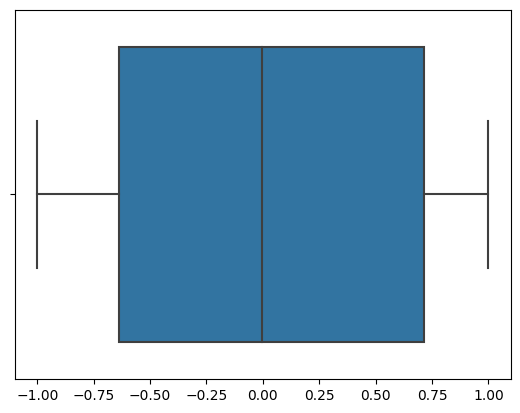

In [11]:
sns.boxplot(x=X2)

Neste caso, não há a existência de dados fora do comum, ou seja, todos eles estão de alguma forma dentro de seus padrões, oque ajuda na hora de distingui-los na análise futura.

# Organizando os Dados

In [12]:
# Treinamento 70% - 30%

class_off = motor_df.loc[motor_df['Y'] == 0]
class_on = motor_df.loc[motor_df['Y'] == 1]

class_on = class_on.reset_index(drop=True)

class_off_train = class_off.iloc[:(round(len(class_off) * 0.7)),]
class_on_train = class_on.iloc[:(round(len(class_on)*0.7)),]

class_on_test = class_on.iloc[(round(len(class_on_train))):]
class_off_test = class_off.iloc[(round(len(class_off_train))):]

In [13]:
# Resetando os dois index

class_on_test = class_on_test.reset_index(drop=True)
class_on_test = class_on_test.reset_index(drop=True)

In [14]:
# Os dados foram organizados de forma correta?

if (len(class_off_test) + len(class_off_train) + len(class_on_test) + len(class_on_train)) == 386 :
    print("Dados estão organizados de forma correta")
    print("Classe 0 de teste: "+ str(len(class_off_test)))
    print("Classe 0 de treino "+ str(len(class_off_train)))
    print("Total: "+str(len(class_off_test) + len(class_off_train)))
    print("\n")
    print("Classe 1 de teste: "+ str(len(class_on_test)))
    print("Classe 1 de treino: "+ str(len(class_on_train)))
    print("Total: "+str(len(class_on_test) + len(class_on_train)))
else:
    print("Dados estão organizados de forma errada")

Dados estão organizados de forma correta
Classe 0 de teste: 57
Classe 0 de treino 133
Total: 190


Classe 1 de teste: 59
Classe 1 de treino: 137
Total: 196


In [15]:
# Mesclando os dados de teste
test_df = pd.concat([class_off_test,class_on_test], ignore_index=True)

# Mesclando os dados de treino
train_df = pd.concat([class_off_train, class_on_train], ignore_index=True)

In [16]:
test_df_Y = test_df['Y'] # Saída esperada

test_df = test_df.drop(columns=['Y']) # Dados de treino

In [17]:
test_df_Y

0      0
1      0
2      0
3      0
4      0
      ..
111    1
112    1
113    1
114    1
115    1
Name: Y, Length: 116, dtype: int64

In [18]:
train_df.shape

(270, 3)

In [19]:
test_df.shape

(116, 2)

In [20]:
# Exportando os dados para CSV
motor_df.to_csv('dataset.csv')
train_df.to_csv('train-data.csv')
test_df.to_csv('test-data.csv')

# Modelo Perceptron

In [21]:
# Função degrau
def degrau_func(x):
    if(x>0):
        return 1
    return 0

In [57]:
import random

#bias
bias = round(random.uniform(0,1), 2)

# pesos
p1 = round(random.uniform(0,1), 2)
p2 = round(random.uniform(0,1), 2)

In [442]:
# Entradas de teste
test_matrix = test_df.to_numpy() # 0 - 115
test_matrix_y = test_df_Y.to_numpy()

# Entradas de treino
train_matrix = train_df.to_numpy()

In [445]:
class Perceptron:
    limit = 0 # limiar inicial
    w = [0,0] # pesos iniciais
    
    def parameters(self):
        print("Limiar inicial: " + str(self.limit))
        print("Pesos: " + str(self.w))
    
    def train(self,inputs_train, learning_rate):
        errors = 0
        
        for x in inputs_train:
            x1w1 = x[0]*self.w[0]
            x2w2 = x[1]*self.w[1]
            
            sigma = (self.limit * -1) + (x1w1 + x2w2) 
            y = degrau_func(sigma)
            #print("Y Result = "+str(y)+" Y Expected = "+str(x[2]))
            
            self.w[0] = self.w[0] + learning_rate*(x[2]-y)*x[0] # Ajuste do peso 1
            self.w[1] = self.w[1] + learning_rate*(x[2]-y)*x[1] # Ajuste do peso 2
            self.limit = self.limit + learning_rate*(x[2]-y)*-1
            
            if((x[2]-y)!=0):
                errors = errors + 1
        print("Error: " + str((errors/len(inputs_train))*100))
        
    def test(self,input_test):
        x1w1 = input_test[0]*self.w[0]
        x2w2 = input_test[1]*self.w[1]
        
        sigma = (self.limit * -1) + (x1w1+x2w2)
        y = degrau_func(sigma)
        
        return y
    def __init__(self, limit):
        self.w[0] = round(random.uniform(0,1), 2)
        self.w[1] = round(random.uniform(0,1), 2)
        self.limit = limit
   

In [446]:
model = Perceptron(0.5)

In [471]:
model.train(train_matrix,0.1)
model.parameters()

Error: 0.0
Limiar inicial: 0.30000000000000004
Pesos: [0.9408071955428398, 0.7201777433097512]
